In [96]:
import os
import pysam    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [97]:
plasmid_sample = pd.read_csv("/gscratch/stergachislab/bmallo/large_home/ft_data/plasmid_mix_71923/plasmid_mix_unfrozen/pEF_GFP_reads/ft_extract_data/pEF_GFP_nuc_molecular.bed", sep="\t", header=None)
plasmid_sample

,0,1,2,3,4,5,6,7,8,9,10,11
0,m84046_230715_053754_s4/234885833/ccs,0,5064,m84046_230715_053754_s4/234885833/ccs,32,+,0,5064,"169,169,169",7,"0,117,99,138,116,109,1","0,1000,1714,2564,3413,4095,5063"
1,m84046_230715_053754_s4/234886975/ccs,0,5207,m84046_230715_053754_s4/234886975/ccs,5,+,0,5207,"169,169,169",7,"0,144,170,107,85,361,1","0,331,499,3709,3817,3903,5206"
2,m84046_230715_053754_s4/246092814/ccs,0,6455,m84046_230715_053754_s4/246092814/ccs,9,+,0,6455,"169,169,169",10,"0,138,91,107,90,124,147,101,91,1","0,1824,2404,2593,4005,4288,4753,5734,5941,6454"
3,m84046_230715_053754_s4/257299455/ccs,0,8164,m84046_230715_053754_s4/257299455/ccs,26,+,0,8164,"169,169,169",17,"0,385,225,233,434,753,498,114,242,876,105,252,...","0,740,1246,1644,2152,3364,4118,4700,4815,5100,..."
4,m84046_230715_053754_s4/235409499/ccs,0,4548,m84046_230715_053754_s4/235409499/ccs,38,+,0,4548,"169,169,169",17,"0,149,90,92,196,162,152,123,136,135,156,197,12...","0,528,832,923,1069,1304,1800,2198,2464,2756,29..."
...,...,...,...,...,...,...,...,...,...,...,...,...
34941,m84046_230715_053754_s4/166399942/ccs,0,2591,m84046_230715_053754_s4/166399942/ccs,17,+,0,2591,"169,169,169",8,"0,802,172,163,105,102,189,1","0,427,1260,1497,2063,2201,2323,2590"
34942,m84046_230715_053754_s4/65603009/ccs,0,4990,m84046_230715_053754_s4/65603009/ccs,30,+,0,4990,"169,169,169",3,"0,129,1","0,948,4989"
34943,m84046_230715_053754_s4/121115436/ccs,0,4480,m84046_230715_053754_s4/121115436/ccs,22,-,0,4480,"169,169,169",6,"0,102,137,155,143,1","0,226,1697,2085,2289,4479"
34944,m84046_230715_053754_s4/100209631/ccs,0,6372,m84046_230715_053754_s4/100209631/ccs,15,-,0,6372,"169,169,169",12,"0,158,143,137,163,165,157,138,159,155,158,1","0,980,1943,2360,3114,3408,3706,4569,4849,5018,..."


In [134]:
#plasmid_sample[10] = plasmid_sample[10].apply(lambda x: [int(item) for item in x.split(",")])
plasmid_sample_explode = plasmid_sample.explode(10)
plasmid_sample_explode = plasmid_sample_explode[(plasmid_sample_explode[10] != 0) & (plasmid_sample_explode[10] != 1)]
plasmid_sample_explode = plasmid_sample_explode[(5023 < plasmid_sample_explode[7]) & (plasmid_sample_explode[7] < 5085)]
plasmid_sample_explode = plasmid_sample_explode[(0 < plasmid_sample_explode[10]) & (plasmid_sample_explode[10] < 200)]
plasmid_sample_explode

,0,1,2,3,4,5,6,7,8,9,10,11
0,m84046_230715_053754_s4/234885833/ccs,0,5064,m84046_230715_053754_s4/234885833/ccs,32,+,0,5064,"169,169,169",7,117,"0,1000,1714,2564,3413,4095,5063"
0,m84046_230715_053754_s4/234885833/ccs,0,5064,m84046_230715_053754_s4/234885833/ccs,32,+,0,5064,"169,169,169",7,99,"0,1000,1714,2564,3413,4095,5063"
0,m84046_230715_053754_s4/234885833/ccs,0,5064,m84046_230715_053754_s4/234885833/ccs,32,+,0,5064,"169,169,169",7,138,"0,1000,1714,2564,3413,4095,5063"
0,m84046_230715_053754_s4/234885833/ccs,0,5064,m84046_230715_053754_s4/234885833/ccs,32,+,0,5064,"169,169,169",7,116,"0,1000,1714,2564,3413,4095,5063"
0,m84046_230715_053754_s4/234885833/ccs,0,5064,m84046_230715_053754_s4/234885833/ccs,32,+,0,5064,"169,169,169",7,109,"0,1000,1714,2564,3413,4095,5063"
...,...,...,...,...,...,...,...,...,...,...,...,...
34939,m84046_230715_053754_s4/78517168/ccs,0,5053,m84046_230715_053754_s4/78517168/ccs,37,+,0,5053,"169,169,169",18,108,"0,158,458,694,819,968,1463,1643,2397,2835,2977..."
34939,m84046_230715_053754_s4/78517168/ccs,0,5053,m84046_230715_053754_s4/78517168/ccs,37,+,0,5053,"169,169,169",18,119,"0,158,458,694,819,968,1463,1643,2397,2835,2977..."
34939,m84046_230715_053754_s4/78517168/ccs,0,5053,m84046_230715_053754_s4/78517168/ccs,37,+,0,5053,"169,169,169",18,147,"0,158,458,694,819,968,1463,1643,2397,2835,2977..."
34939,m84046_230715_053754_s4/78517168/ccs,0,5053,m84046_230715_053754_s4/78517168/ccs,37,+,0,5053,"169,169,169",18,113,"0,158,458,694,819,968,1463,1643,2397,2835,2977..."


In [135]:
column_stats = plasmid_sample_explode[10].describe()
print(plasmid_sample_explode[10].mean())
print(plasmid_sample_explode[10].mode())
print(column_stats)

133.43614195514914
0    126
Name: 10, dtype: object
count     45930
unique      125
top         126
freq        797
Name: 10, dtype: int64


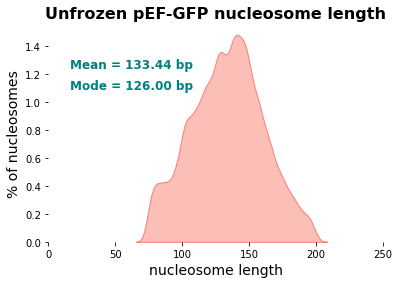

In [139]:
# Assuming you have your DataFrame 'plasmid_sample_explode'
column_name = 10

# Define the color for the plot and the background color (facecolor)
plot_color = 'salmon'
background_color = 'white'

# Create the density plot with custom color and background color
sns.kdeplot(data=plasmid_sample_explode[column_name], color=plot_color, fill=True, alpha=0.5, bw_adjust=1)

# Calculate the mean and mode of the data
mean_value = plasmid_sample_explode[column_name].mean()
mode_value = plasmid_sample_explode[column_name].mode()[0]

# Add the mean and mode value labels as a text annotation below the title
plt.text(0.25, 0.8, f'Mean = {mean_value:.2f} bp', color='teal', ha='center', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.25, 0.7, f'Mode = {mode_value:.2f} bp', color='teal', ha='center', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)

# Set the background color
plt.gca().set_facecolor(background_color)

# Remove the grid
plt.grid(False)

# Add a title
plt.title('Unfrozen pEF-GFP nucleosome length', fontsize=16, fontweight='bold')

# Add x and y-axis labels
plt.xlabel('nucleosome length', fontsize=14)
plt.ylabel('% of nucleosomes', fontsize=14)

# Add x and y limits
plt.xlim(0, 250)

# Remove the black border surrounding the graph
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Function to format y-axis labels as if they were multiplied by 100
def y_axis_formatter(x, pos):
    return f'{x*100:.1f}'

# Create a FuncFormatter and apply it to the y-axis
y_formatter = ticker.FuncFormatter(y_axis_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

plt.savefig('/gscratch/stergachislab/bmallo/large_home/ft_data/plasmid_mix_71923/plasmid_mix_unfrozen/pEF_GFP_reads/figures/nuc_length_filtered.png', dpi=300, bbox_inches='tight')

